In [1]:
import keras

Using TensorFlow backend.


In [2]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(y_train)

60000

In [8]:
x_train[9487].shape

(28, 28)

In [9]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

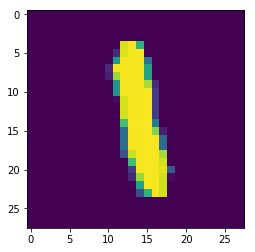

In [10]:
plt.imshow(x_train[9487])

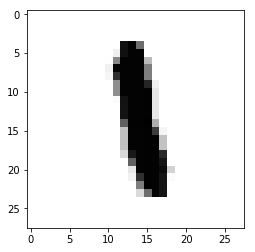

In [11]:
plt.imshow(x_train[9487], cmap='Greys')

In [12]:
y_train[9487]

1

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [15]:
#1-hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
#2 hidden layers, each layer has 500 neurons, activation function is sigmoid

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [18]:
#new NN
model = Sequential()

In [19]:
#add first hidden layer
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

In [20]:
#add second hidden layer
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [21]:
#output layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
#loss function is mse, optimizer is SGD, learning rate is 0.1, and add metrics=['accuracy'] to check accuracy while training the model
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [23]:
#check model
#392500 = 784*500 + 500 (input is 784, and weight is 500 neurons, bias is 500 =the amount of neurons)
#250500 = 500*500 +500 (input of previous layer is 500, the neurons of second layer is 500, bias is 500 =the amount of neurons)
#5010 = 500*10 + 10
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [24]:
#plot model
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model01.png')

In [25]:
#Train Model
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0821 - acc: 0.3366
Epoch 2/20
60000/60000 [==============================] - 16s 260us/step - loss: 0.0630 - acc: 0.6292
Epoch 3/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.0457 - acc: 0.7553
Epoch 4/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0337 - acc: 0.8258
Epoch 5/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.0263 - acc: 0.86868s - lo - ETA:
Epoch 6/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0218 - acc: 0.8855
Epoch 7/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.0190 - acc: 0.89670s - loss: 0.0190 - acc: 0.896
Epoch 8/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.0171 - acc: 0.90415s - loss: 0.01 - ETA: 4s 
Epoch 9/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.0157 - acc: 0.91041 - ETA: 0s -

In [26]:
#interactive
from ipywidgets import interact_manual

In [28]:
predict = model.predict_classes(x_test)

def test(testNum):
    plt.imshow(x_test[testNum].reshape(28,28), cmap="Greys")
    print("The predict result is:", predict[testNum])
    
interact_manual(test, testNum = (0, 9999));

interactive(children=(IntSlider(value=4999, description='testNum', max=9999), Button(description='Run Interact…

In [29]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 1s 143us/step
loss: 0.010629343390231952
accuracy: 0.9339
